<a href="https://colab.research.google.com/github/prajaktaninave20/Data-Analyst-Assignments-ExcelR-Solution-/blob/main/BinningWithPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns


<Axes: ylabel='Frequency'>

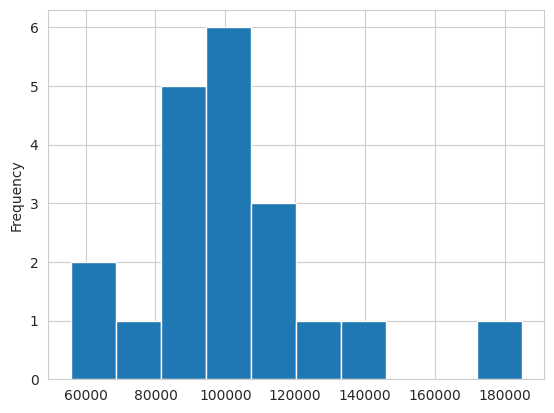

In [ ]:
sns.set_style('whitegrid')

raw_df = pd.read_excel('https://github.com/chris1610/pbpython/blob/master/data/2018_Sales_Total_v2.xlsx?raw=true')

df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

df['ext price'].plot(kind='hist')


In [ ]:

df['ext price'].describe()

count        20.000000
mean     101711.287500
std       27037.449673
min       55733.050000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      184793.700000
Name: ext price, dtype: float64

In [ ]:
pd.qcut(df['ext price'], q=4)


0     (55733.049000000006, 89137.708]
1             (89137.708, 100271.535]
2     (55733.049000000006, 89137.708]
3              (110132.552, 184793.7]
4             (89137.708, 100271.535]
5             (89137.708, 100271.535]
6     (55733.049000000006, 89137.708]
7            (100271.535, 110132.552]
8              (110132.552, 184793.7]
9              (110132.552, 184793.7]
10            (89137.708, 100271.535]
11    (55733.049000000006, 89137.708]
12    (55733.049000000006, 89137.708]
13            (89137.708, 100271.535]
14           (100271.535, 110132.552]
15             (110132.552, 184793.7]
16           (100271.535, 110132.552]
17             (110132.552, 184793.7]
18           (100271.535, 110132.552]
19           (100271.535, 110132.552]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(55733.049000000006, 89137.708] < (89137.708, 100271.535] <
                                           (100271.535, 110132.552] < (110132.552, 184793.7]]

In [ ]:
df['quantile_ex_1'] = pd.qcut(df['ext price'], q=4)
df['quantile_ex_2'] = pd.qcut(df['ext price'], q=10, precision=0)

df.head()

,account number,name,ext price,quantile_ex_1,quantile_ex_2
0,141962,Herman LLC,63626.03,"(55733.049000000006, 89137.708]","(55732.0, 76471.0]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]"
2,163416,Purdy-Kunde,77898.21,"(55733.049000000006, 89137.708]","(76471.0, 87168.0]"
3,218895,Kulas Inc,137351.96,"(110132.552, 184793.7]","(124778.0, 184794.0]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]"


In [ ]:
df['quantile_ex_1'].value_counts()

(55733.049000000006, 89137.708]    5
(89137.708, 100271.535]            5
(100271.535, 110132.552]           5
(110132.552, 184793.7]             5
Name: quantile_ex_1, dtype: int64

In [ ]:
df['quantile_ex_2'].value_counts()

(55732.0, 76471.0]      2
(76471.0, 87168.0]      2
(87168.0, 90686.0]      2
(90686.0, 95908.0]      2
(95908.0, 100272.0]     2
(100272.0, 103606.0]    2
(103606.0, 105938.0]    2
(105938.0, 112290.0]    2
(112290.0, 124778.0]    2
(124778.0, 184794.0]    2
Name: quantile_ex_2, dtype: int64

In [ ]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,quantile_ex_3
0,141962,Herman LLC,63626.03,Bronze
1,146832,Kiehn-Spinka,99608.77,Gold
2,163416,Purdy-Kunde,77898.21,Bronze
3,218895,Kulas Inc,137351.96,Diamond
4,239344,Stokes LLC,91535.92,Silver


In [ ]:
df['quantile_ex_3'].value_counts()

Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: quantile_ex_3, dtype: int64

In [ ]:
results, bin_edges = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=bin_labels_5,
                            retbins=True)

results_table = pd.DataFrame(zip(bin_edges, bin_labels_5),
                            columns=['Threshold', 'Tier'])

print(results_table)

    Threshold      Tier
0   55733.050    Bronze
1   87167.958    Silver
2   95908.156      Gold
3  103605.970  Platinum
4  112290.054   Diamond


In [ ]:
df.describe(include='category')

,quantile_ex_3
count,20
unique,5
top,Bronze
freq,4


In [ ]:
df.describe(percentiles=[0, 1/3, 2/3, 1])

,account number,ext price
count,20.000000,20.000000
mean,476998.750000,101711.287500
std,231499.208970,27037.449673
min,141962.000000,55733.050000
0%,141962.000000,55733.050000
33.3%,332759.333333,91241.493333
50%,476006.500000,100271.535000
66.7%,662511.000000,104178.580000
100%,786968.000000,184793.700000
max,786968.000000,184793.700000


In [ ]:
df['quantile_ex_4'] = pd.qcut(df['ext price'],
                            q=[0, .2, .4, .6, .8, 1],
                            labels=False,
                            precision=0)
df.head()

,account number,name,ext price,quantile_ex_3,quantile_ex_4
0,141962,Herman LLC,63626.03,Bronze,0
1,146832,Kiehn-Spinka,99608.77,Gold,2
2,163416,Purdy-Kunde,77898.21,Bronze,0
3,218895,Kulas Inc,137351.96,Diamond,4
4,239344,Stokes LLC,91535.92,Silver,1


In [ ]:
df = df.drop(columns = ['quantile_ex_1','quantile_ex_2', 'quantile_ex_3', 'quantile_ex_4'])

In [ ]:
pd.cut(df['ext price'], bins=4)

0       (55603.989, 87998.212]
1      (87998.212, 120263.375]
2       (55603.989, 87998.212]
3     (120263.375, 152528.538]
4      (87998.212, 120263.375]
5      (87998.212, 120263.375]
6       (55603.989, 87998.212]
7      (87998.212, 120263.375]
8      (87998.212, 120263.375]
9       (152528.538, 184793.7]
10     (87998.212, 120263.375]
11      (55603.989, 87998.212]
12      (55603.989, 87998.212]
13     (87998.212, 120263.375]
14     (87998.212, 120263.375]
15    (120263.375, 152528.538]
16     (87998.212, 120263.375]
17     (87998.212, 120263.375]
18     (87998.212, 120263.375]
19     (87998.212, 120263.375]
Name: ext price, dtype: category
Categories (4, interval[float64, right]): [(55603.989, 87998.212] < (87998.212, 120263.375] <
                                           (120263.375, 152528.538] < (152528.538, 184793.7]]

In [ ]:
pd.cut(df['ext price'], bins=4).value_counts()

(87998.212, 120263.375]     12
(55603.989, 87998.212]       5
(120263.375, 152528.538]     2
(152528.538, 184793.7]       1
Name: ext price, dtype: int64

In [ ]:
cut_labels_4 = ['silver', 'gold', 'platinum', 'diamond']
cut_bins = [0, 70000, 100000, 130000, 200000]
df['cut_ex1'] = pd.cut(df['ext price'], bins=cut_bins, labels=cut_labels_4)
df.head()

,account number,name,ext price,quantile_ex_3,quantile_ex_4,cut_ex1
0,141962,Herman LLC,63626.03,Bronze,0,silver
1,146832,Kiehn-Spinka,99608.77,Gold,2,gold
2,163416,Purdy-Kunde,77898.21,Bronze,0,gold
3,218895,Kulas Inc,137351.96,Diamond,4,diamond
4,239344,Stokes LLC,91535.92,Silver,1,gold


In [ ]:
pd.cut(df['ext price'], bins=np.linspace(0, 200000, 9))

0       (50000.0, 75000.0]
1      (75000.0, 100000.0]
2      (75000.0, 100000.0]
3     (125000.0, 150000.0]
4      (75000.0, 100000.0]
5      (75000.0, 100000.0]
6      (75000.0, 100000.0]
7     (100000.0, 125000.0]
8     (100000.0, 125000.0]
9     (175000.0, 200000.0]
10     (75000.0, 100000.0]
11      (50000.0, 75000.0]
12     (75000.0, 100000.0]
13     (75000.0, 100000.0]
14    (100000.0, 125000.0]
15    (100000.0, 125000.0]
16    (100000.0, 125000.0]
17    (100000.0, 125000.0]
18    (100000.0, 125000.0]
19    (100000.0, 125000.0]
Name: ext price, dtype: category
Categories (8, interval[float64, right]): [(0.0, 25000.0] < (25000.0, 50000.0] <
                                           (50000.0, 75000.0] < (75000.0, 100000.0] <
                                           (100000.0, 125000.0] < (125000.0, 150000.0] <
                                           (150000.0, 175000.0] < (175000.0, 200000.0]]

In [ ]:
pd.interval_range(start=0, freq=10000, end=200000, closed='left')

IntervalIndex([[0, 10000), [10000, 20000), [20000, 30000), [30000, 40000), [40000, 50000) ... [150000, 160000), [160000, 170000), [170000, 180000), [180000, 190000), [190000, 200000)], dtype='interval[int64, left]')

In [ ]:
interval_range = pd.interval_range(start=0, freq=10000, end=200000)
df['cut_ex2'] = pd.cut(df['ext price'], bins=interval_range, labels=[1,2,3])
df.head()

,account number,name,ext price,quantile_ex_3,quantile_ex_4,cut_ex1,cut_ex2
0,141962,Herman LLC,63626.03,Bronze,0,silver,"(60000, 70000]"
1,146832,Kiehn-Spinka,99608.77,Gold,2,gold,"(90000, 100000]"
2,163416,Purdy-Kunde,77898.21,Bronze,0,gold,"(70000, 80000]"
3,218895,Kulas Inc,137351.96,Diamond,4,diamond,"(130000, 140000]"
4,239344,Stokes LLC,91535.92,Silver,1,gold,"(90000, 100000]"


In [ ]:
df['ext price'].value_counts(bins=4, sort=False)

(55603.988000000005, 87998.212]     5
(87998.212, 120263.375]            12
(120263.375, 152528.538]            2
(152528.538, 184793.7]              1
Name: ext price, dtype: int64